## Importing Liabraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [2]:
data = pd.read_csv('study_data.csv')

In [3]:
data.head()

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.98,0.24,Low
4,0.72,0.25,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  147 non-null    float64
 1   study_time       147 non-null    float64
 2   knowledge_level  147 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [5]:
data.describe()

,repetition_time,study_time
count,147.000000,147.000000
mean,0.495646,0.465259
std,0.250635,0.282116
min,0.000000,0.000000
25%,0.280000,0.250000
50%,0.480000,0.300000
75%,0.720000,0.780000
max,0.990000,0.930000


#### Counting Unique Values

In [6]:
data['knowledge_level'].unique()

array(['Low', 'High'], dtype=object)

In [7]:
data['knowledge_level'].value_counts()

Low     84
High    63
Name: knowledge_level, dtype: int64

### Splitting Data

In [8]:
x = data.drop(data.columns[[2]],axis = 1)
y = data['knowledge_level']

In [9]:
x.head()

,repetition_time,study_time
0,0.00,0.00
1,0.24,0.90
2,0.25,0.33
3,0.98,0.24
4,0.72,0.25


In [10]:
y.head()

0     Low
1    High
2     Low
3     Low
4     Low
Name: knowledge_level, dtype: object

In [11]:
y = pd.get_dummies(data , columns = ['knowledge_level'])

In [12]:
y.head()

,repetition_time,study_time,knowledge_level_High,knowledge_level_Low
0,0.00,0.00,0,1
1,0.24,0.90,1,0
2,0.25,0.33,0,1
3,0.98,0.24,0,1
4,0.72,0.25,0,1


<font color = 'red'> we need to take either knowledge_level_high or low so will be taking knowledge_level_high

In [13]:
#splitting x and y by train_test_split

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x , y['knowledge_level_High'] , test_size= 0.2 , random_state= 0)

## Scaling Data (Feature Scaling)

In [14]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest) 

# <font color = "green"><b>Random Forest</font>

### Traning Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, criterion= 'entropy',random_state=0)

rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=0)

### Predicting test_input

In [17]:
y_predict = rf.predict(xtest)
y_predict

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

### Results

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,y_predict)

In [19]:
cm

array([[15,  0],
       [ 0, 15]], dtype=int64)

 ### Accuracy

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)

1.0

# Visualising the model performance 

<font color = 'red'> will be also checking the hyper plane that our model is building up </font>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


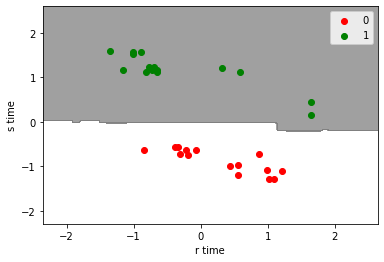

In [22]:
# to diffrentitae the class will be using matpotlib and meshgrid to plot the hyperplane

from matplotlib.colors import ListedColormap

xset, yset, = xtest, ytest

#meshgrade return co-ordiante matrix from a co-ordinate vectrors
#basically use to create rectanglular grid outof 2 given 1-d array
#so will be findin out co-ordinate

x1, x2 =  np.meshgrid(np.arange(start = xset[: , 0].min()-1 , stop = xset[: , 0].max()+1, step =0.01),
                      np.arange(start = xset[: , 1].min()-1 , stop = xset[: , 1].max()+1, step =0.01))
            
# repetation_time will go to - x1
# study_time will go to - x2

# we will use contor function to draw lines and fill the counter , so that we can say which region belongs to which class

plt.contourf(x1,x2, rf.predict(np.array([ x1.ravel(), x2.ravel() ]).T).reshape(x1.shape) , alpha = 0.75 ,
             cmap = ListedColormap(('white','grey')))
             
#setting limits
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())


#now we have to plot all the datapoints

for i,j in enumerate( np.unique(yset)):
    plt.scatter (xset[yset == j , 0 ], xset[yset == j,1],
                c = ListedColormap(('red', 'green'))(i) , label = j)
    
plt.xlabel('r time')
plt.ylabel('s time')
plt.legend()
plt.show()